# Introduction to `Scikit-learn`

The `scikit-learn` package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

<img src="http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png" width="800px"/>

## What is Machine Learning?

Machine Learning (ML) is about coding programs that automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

There are three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and support vector machines.

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. We will not cover RL in this course.

## Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

## `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: 

* **estimator** interface for building and ﬁtting models
* **predictor** interface for making predictions
* **transformer** interface for converting data.

The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

The consistent interface across machine learning methods makes it easy to switch between different approaches without drastically changing the form of the data or the supporting code, making experimentation and prototyping fast and easy.

Scikit-learn strives to have a uniform interface across all methods. For example, a typical **estimator** follows this template:

In [1]:
class Estimator(object):
  
    def fit(self, X, y=None):
        """Fit model to data X (and y)"""
        self.some_attribute = self.some_fitting_method(X, y)
        return self
            
    def predict(self, X_test):
        """Make prediction based on passed features"""
        pred = self.make_prediction(X_test)
        return pred

For a given scikit-learn **estimator** object named `model`, several methods are available. Irrespective of the type of **estimator**, there will be a `fit` method:

- `model.fit` : fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

> During the fitting process, the state of the **estimator** is stored in attributes of the estimator instance named with a trailing underscore character (\_). For example, the sequence of regression trees `sklearn.tree.DecisionTreeRegressor` is stored in `estimators_` attribute.

The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

**supervised estimators** are expected to have the following methods:

- `model.predict` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
- `model.predict_proba` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
- `model.score` : for classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a `transform` method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

**unsupervised estimators** will always have these methods:

- `model.transform` : given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
- `model.fit_transform` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

# Supervised Learning: Decision Trees

For methods like support vector machines to work well, it requires identifying an appropriate kernel function, which is not always straightforward or intuitive.

An alternative to this is to perform statistical learning more directly, say, as a combination of the predictors (features). An **adaptive basis-function model** (ABM) is one example of this.

$$f(x) = w_0 + \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

here, $\phi_j$ is a *basis function*, which is typically parametric:

$$\phi_j(\mathbf{x}) = \phi_j(\mathbf{x}|\alpha_j)$$

The parameter set for this model is thus $\theta = \{\mathbf{w} = w_0,\ldots,w_k; \mathbf{\alpha} = \alpha_1, \ldots, \alpha_k\}$. This model is *not* linear in the parameters.


**Decision trees** use an ABM to *recursively partition* the space of predictor variables into a piecewise-constant response surface. We can consider each component $j=1,\ldots,k$ to be a region in the response surface, and $w_j$ the expected response in that region.

$$f(x) = \sum_{j=1}^k w_j I(\mathbf{x} \in R_j)$$

Each paramter $\alpha_j$ encodes both (1) a variable used for splitting and (2) the corresponding threshold value. Specifically, the basis functions define the regions, and the weights encode the response value in each region.

This particular formulation implies a regression-type model, but we can generalize this to classification by storing the *distribution over classes* in each leaf, instead of the mean response.

To get a sense of how decision trees work, consider the diabetes dataset that we have seen previously. In the plot below, the response variable (`target`, an index of disease progression) is color-coded as a function of two variables, metabolic rate (`bmi`) and a blood serum measurement (`ltg`).

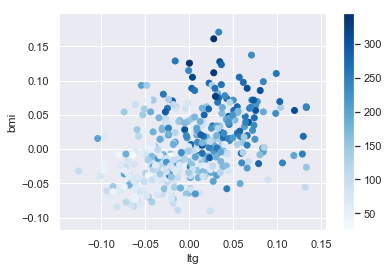

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.datasets import load_diabetes

# Predictors: "age" "sex" "bmi" "map" "tc"  "ldl" "hdl" "tch" "ltg" "glu"
diabetes = load_diabetes()
y = diabetes['target']
bmi, ltg = diabetes['data'][:,[2,8]].T

plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

One approach to building a predictive model is to subdivide the variable space into regions, by sequentially subdividing each variable. For example, if we split `ltg` at a threshold value of -0.01, it does a reasonable job of isolating the large values in one of the resulting subspaces.

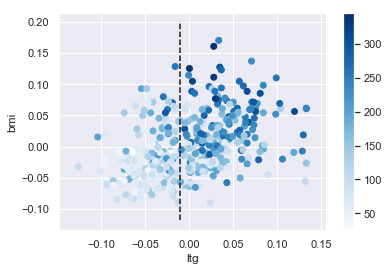

In [3]:
ltg_split = -0.01
plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

However, that region still contains a fair number of low (blue) values, so we can similarly bisect the region using a `bmi` value of -0.03 as a threshold value:

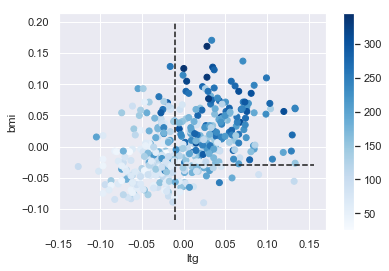

In [4]:
bmi_split = -0.03
plt.scatter(ltg, bmi,  c=y, cmap="Blues")
plt.vlines(ltg_split, *plt.gca().get_ylim(), linestyles='dashed')
plt.hlines(bmi_split, ltg_split, plt.gca().get_xlim()[1], linestyles='dashed')
plt.colorbar()
plt.xlabel('ltg'); plt.ylabel('bmi');

We can use this partition to create a piecewise-constant function, which returns the average value of the observations in each region defined by the threshold values. We could then use this rudimentary function as a predictive model.

In [5]:
np.mean(y[(bmi>bmi_split) & (ltg>ltg_split)])

197.69417475728156

In [6]:
np.mean(y[(bmi<=bmi_split) & (ltg>ltg_split)])

136.93939393939394

In [7]:
np.mean(y[ltg<ltg_split])

108.36945812807882

The choices for splitting the variables here were relatively arbitrary. Better choices can be made using a cost function $C$, such as **residual sums of squares** (RSS).

$$C = \sum_j \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2$$

where $\hat{y}_{R_j}$ is the mean response for the training observations in the jth region.

The recursive partitioning demonstrated above results in a **decision tree**. The regions defined by the trees are called *terminal nodes*. Locations at which a predictor is split, such as `bmi`=-0.03, are called  *internal nodes*. As with this simple example, splits are not generally symmetric, in the sense that splits do not occur similarly on all branches.

Now consider a subset of three variables from the Titanic dataset, which we would like to use to predict survival from the disaster. The following describes one such decision tree:

- We first check if gender of the passenger is male. If "no", we follow the right branch and end up in a leaf where the probability of survival is $p(y=1,x_1=F)=0.73$, so we predict survival ($y=1$) at this node (36% of observations fall under this leaf)
- If the passenger is male, we then check the age of the passenger. If he is older than 9.5 years, then the probability of survival $p(y=1,x_1=M,x_2>9.5)=0.17$, so we predict death ($y=0$). 
- If, on the other hand, the passenger is younger than 9.5 years, we then check if the number of siblings and spouses on board was higher than 2.5; if "yes", then the probability of survival  $p(y=1, x_1=M, x_2>9.5, x_3>2.5)=0.05$, so we predict death, otherwise we predict survival with $p(y=1, x_1=M, x_2>9.5 , x_3 \lt 2.5)=0.89$. 

Hence, these probabilities are just the empirical fraction of positive examples that satisfy each conjunction of feature values, which defines a path from the root to a leaf.

![titanic tree](http://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

There is no way to feasibly evaluate all possible partitions. Instead, the strategy is to use a top-down, **greedy** approach that is optimal (according to a particular cost function) for the current split only. By "greedy", we mean that at each step it chooses the most advantageous binary partition, not taking into account the impact of the choice on the quality of subsequent partitions.

$$(j^*, t^*) = \text{argmin}_{j,t} C(\{\mathbf{x}_i,y_i: x_{ij} \le t\}) + C(\{\mathbf{x}_i,y_i: x_{ij} \gt t\})$$

where $C$ is a cost function, $j$ and $t$ are a variable index and cutpoint, respectively. We will restrict consideration to **binary partitions**.

## Classification Trees

In addition to regression trees, we can also use decision trees on categorical outcomes, and these are called classification trees. The primary difference in implementation is that residual sums of squares is no longer an appropriate splitting criterion.

### Entropy

An alternative splitting criterion for decision tree learning algorithms is *information gain*. It measures how well a particular attribute distinguishes among different target classifications. Information gain is measured in terms of the expected reduction in the entropy or impurity of the data. The entropy of a set of probabilities is:

$$H(p) = -\sum_i p_i log_2(p_i)$$

If we have a set of binary responses from some variable, all of which are positive/true/1, then knowing the values of the variable does not hold any predictive value for us, since all the outcomes are positive. Hence, the entropy is zero:

In [8]:
import numpy as np

entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

In [9]:
entropy([.4,.6])

0.9709505944546686

However, if the variable splits responses into equal numbers of positive and negative values, then entropy is maximized, and we wish to know about the feature:

In [10]:
entropy([0.5, 0.5])

1.0

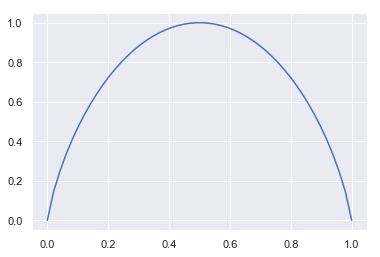

In [11]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p]) for p in pvals])

The entropy calculation tells us how much additional information we would obtain with knowledge of the variable.

So, if we have a set of candidate covariates from which to choose as a node in a decision tree, we should choose the one that gives us the most information about the response variable (*i.e.* the one with the highest entropy).

### Misclassification Rate

Alternatively, we can use the misclassification rate:

$$C(j,t) = \frac{1}{n_{jt}} \sum_{y_i: x_{ij} \gt t} I(y_i \ne \hat{y})$$

where $\hat{y}$ is the most probable class label and $n_{ij}$ is the number of observations in the data subset obtained from splitting via $j,t$.

### Gini index

The Gini index is simply the expected error rate:

$$C(j,t) = \sum_{k=1}^K \hat{\pi}_{jt}[k] (1 - \hat{\pi}_{jt}[k]) = 1 - \sum_{k=1}^K \hat{\pi}_{jt}[k]^2$$

where $\hat{\pi}_{jt}[k]$ is the probability of an observation being correctly classified as class $k$ for the data subset obtained from splitting via $j,t$ (hence, $(1 - \hat{\pi}_{jt}[k])$ is the misclassification probability).

In [12]:
gini = lambda p: 1. - (np.array(p)**2).sum()

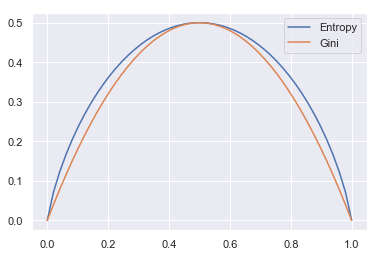

In [13]:
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

## Decision Trees in `scikit-learn`

Classification trees, either binary or multi-class, are implemented in `scikit-learn` in the `DecisionTreeClassifier` class. Where trees are binary, it expects the response variable to be coded as `[-1,1]` for negative and positive outcomes.

Let's build a decision tree on the wine dataset.

In [14]:
wine = pd.read_csv("../data/wine.dat", sep='\s+')

attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape
wine.columns = attributes
X = wine

In [15]:
from sklearn import tree
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=0)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

If you have [GraphViz](http://www.graphviz.org) and `pydot` installed, you can draw the resulting tree:

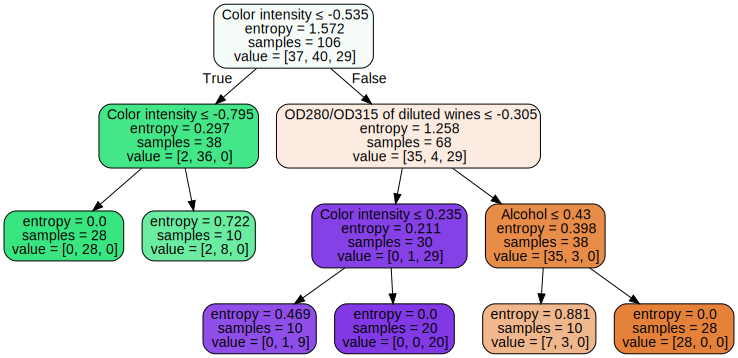

In [16]:
import graphviz
gv_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=attributes,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graphviz.Source(gv_data)

In [17]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,1,2,3
actual,,,
1,20,2,0
2,5,24,2
3,1,0,18


##  Averaging Trees

Decision trees have several advantages: 

* ease of interpretation
* easy of implementation
* handles continuous and discrete features (and mixed)
* invariant to monotone transformation of features
* variable selection automated (ignores redundant variables)
* robust
* scalable (can handle huge datasets)

However, relative to other statistical learning methods, trees do not predict very accurately, due to the greedy nature of the tree construction algorithm. Also, trees tend to be **unstable**, as small changes to the inputs can have large effects on the structure of the tree; poor decisions near the root of the tree will propogate to the rest of the tree. Hence, trees are **high variance** (*i.e.* noisy) estimators.

One way to reduce the variance of an estimate is to average together many estimates. In the case of decision trees, we can train $T$ different trees on random subsets of the data (with replacement) then average according to:

$$\hat{f}(\mathbf{x}) = \frac{1}{T} \sum_{i=1}^T f_t(\mathbf{x})$$

where $f_t$ is the $t^{th}$ tree. This approach is called "bootstrap aggregating", or **bagging**.

Note that, since we are averaging over trees, there is *no need to prune*. With bagging, we reduce variance by averaging, rather than by pruning.

In [18]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_jobs=4, oob_score=True)
bc

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=4, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [19]:
bc.fit(X_train, y_train)

preds = bc.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

/Users/fonnescj/anaconda3/envs/enar_tutorial/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/fonnescj/anaconda3/envs/enar_tutorial/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


prediction,1,2,3
actual,,,
1,21,1,0
2,0,29,2
3,0,0,19


Test error of a bagged model is measured by estimating **out-of-bag error**.

On average, each bagged tree uses about 2/3 of observations, leaving the remaining third as "out-of bag". The response for the ith observation for each of the trees in which that observation was excluded (on average, B/3) is averaged. This essentially the same as performing leave-one-out (LOO) cross-validation.

In [20]:
bc.oob_score_

0.8962264150943396

This approach is an **ensemble learning** method, because it takes a set of *weak* learners, and combines them to construct a *strong* learner that is more robust, with lower generalization error.

An average of B trees, each with variance $\sigma^2$, has variance $\sigma^2/B$. If the variables are simply identically distributed, with positive pairwise correlation $\rho$, then the variance of the average of the B trees is:

$$\rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$

As the number of trees becomes large, the second term goes to zero. Further reductions in variance are limited by the size of the **correlation** among the trees $\rho$.

## Random Forests

**Random forests** improves upon bagging by creating a set of decision trees that are less correlated than bootstrapped trees. This is done by selecting from only a subset $m$ out of $M$ possible predictors at each split. Typically, we choose approximately the square root of the available number.

This procedure is used to create a set of trees, most of which will be poor at predicting a given observation. However, classification is based on a *majority vote* of the constituent trees.

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

/Users/fonnescj/anaconda3/envs/enar_tutorial/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


prediction,1,2,3
actual,,,
1,22,0,0
2,0,30,1
3,0,0,19


With random forests, it is possible to quantify the **relative importance** of feature inputs for classification. In scikit-learn, the Gini index (recall, a measure of error reduction) is calculated for each internal node that splits on a particular feature of a given tree, which is multiplied by the number of samples that were routed to the node (this approximates the probability of reaching that node). For each variable, this quantity is averaged over the trees in the forest to yield a measure of importance.

In [22]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Color intensity (0.185765)
2. Flavanoids (0.172760)
3. Alcohol (0.155889)
4. Proline (0.151231)
5. OD280/OD315 of diluted wines (0.123298)
6. Total phenols (0.066815)
7. Malic acid (0.032838)
8. Alcalinity of ash (0.029036)
9. Nonflavanoid phenols (0.028281)
10. Hue (0.027844)
11. Magnesium (0.021885)
12. Proanthocyanins (0.002440)
13. Ash (0.001916)


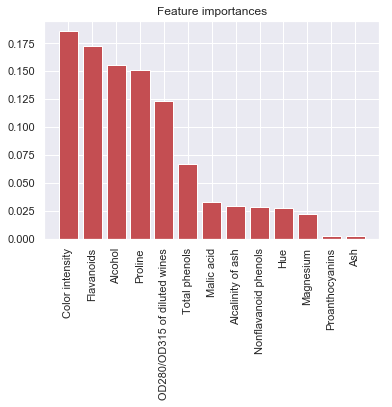

In [23]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]]);

`RandomForestClassifier` uses the Gini impurity index by default; one may instead use the entropy information gain as a criterion.

In [24]:
rf = RandomForestClassifier(n_jobs=4, criterion='entropy')
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

/Users/fonnescj/anaconda3/envs/enar_tutorial/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. Color intensity (0.216814)
2. Flavanoids (0.173341)
3. Proline (0.117536)
4. Total phenols (0.112312)
5. Alcohol (0.105322)
6. Alcalinity of ash (0.101085)
7. OD280/OD315 of diluted wines (0.070223)
8. Hue (0.037353)
9. Malic acid (0.031491)
10. Nonflavanoid phenols (0.017305)
11. Proanthocyanins (0.013638)
12. Magnesium (0.003580)
13. Ash (0.000000)


---
## To Learn More

- [`scikit-learn` user's guide](http://scikit-learn.org/stable/user_guide.html)
- Vanderplas, J. (2016) [Python Data Science Handbook: Essential Tools for Working with Data](http://shop.oreilly.com/product/0636920034919.do). O'Reilly Media.
- [scikit-learn course for 2017 NGCM Summer Academy](https://github.com/fonnesbeck/ngcm_sklearn_2017)